In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
customer = pd.read_csv('Data/customer_data.csv')
customer.shape

(1000, 4)

In [22]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  1000 non-null   int64 
 1   Name        1000 non-null   object
 2   Age         1000 non-null   int64 
 3   Address     1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB


In [14]:
customer.head()

,CustomerID,Name,Age,Address
0,1001,Customer 1001,54,Address 1001
1,1002,Customer 1002,35,Address 1002
2,1003,Customer 1003,40,Address 1003
3,1004,Customer 1004,30,Address 1004
4,1005,Customer 1005,46,Address 1005


In [15]:
customer.describe()

,CustomerID,Age
count,1000.000000,1000.000000
mean,1500.500000,39.892000
std,288.819436,13.524394
min,1001.000000,18.000000
25%,1250.750000,28.000000
50%,1500.500000,39.000000
75%,1750.250000,51.000000
max,2000.000000,64.000000


In [19]:
account = pd.read_csv('Data/account_activity.csv')
account

,CustomerID,AccountBalance,LastLogin
0,1001,9507.272060,2022-01-01
1,1002,7408.704536,2022-01-02
2,1003,1715.321989,2022-01-03
3,1004,3101.509134,2022-01-04
4,1005,5405.766914,2022-01-05
...,...,...,...
995,1996,8523.485163,2024-09-22
996,1997,9255.451757,2024-09-23
997,1998,9148.652759,2024-09-24
998,1999,7376.854107,2024-09-25


In [24]:
account.shape

(1000, 3)

In [21]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   AccountBalance  1000 non-null   float64
 2   LastLogin       1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [23]:
account.describe()

,CustomerID,AccountBalance
count,1000.000000,1000.000000
mean,1500.500000,5558.067698
std,288.819436,2596.890997
min,1001.000000,1009.248716
25%,1250.750000,3297.255763
50%,1500.500000,5569.672709
75%,1750.250000,7910.029699
max,2000.000000,9999.776239


In [25]:
customerAccount = pd.merge(customer, account, on='CustomerID')
customerAccount

,CustomerID,Name,Age,Address,AccountBalance,LastLogin
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05
...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25


In [26]:
susAct = pd.read_csv('Data/suspicious_activity.csv')
susAct

,CustomerID,SuspiciousFlag
0,1001,0
1,1002,0
2,1003,0
3,1004,0
4,1005,0
...,...,...
995,1996,0
996,1997,0
997,1998,0
998,1999,0


In [27]:
susAct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   CustomerID      1000 non-null   int64
 1   SuspiciousFlag  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [28]:
customerAct = pd.merge(customer, susAct, on='CustomerID')
customerAct


,CustomerID,Name,Age,Address,SuspiciousFlag
0,1001,Customer 1001,54,Address 1001,0
1,1002,Customer 1002,35,Address 1002,0
2,1003,Customer 1003,40,Address 1003,0
3,1004,Customer 1004,30,Address 1004,0
4,1005,Customer 1005,46,Address 1005,0
...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,0
996,1997,Customer 1997,58,Address 1997,0
997,1998,Customer 1998,25,Address 1998,0
998,1999,Customer 1999,57,Address 1999,0


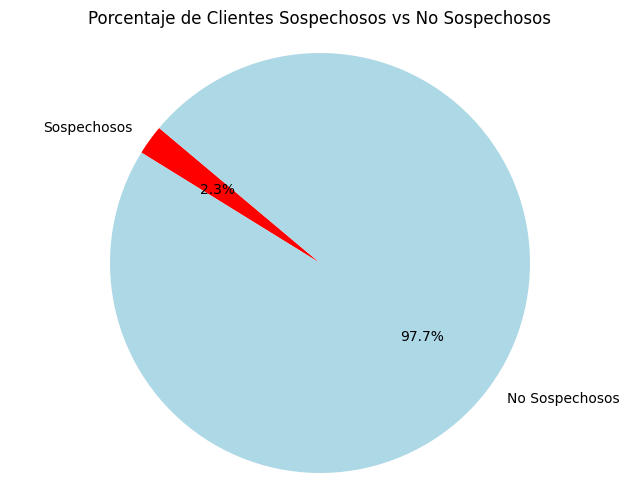

In [42]:
import matplotlib.pyplot as plt

cantSospechosos = customerAct['SuspiciousFlag'].sum()
cantNoSpechosos = len(customerAct) - cantSospechosos
sospechososPorcentaje = (cantSospechosos / len(customerAct)) * 100
noSospechososPorcentaje = 100 - sospechososPorcentaje


tamaño = [sospechososPorcentaje, noSospechososPorcentaje]

etiquetas = ['Sospechosos', 'No Sospechosos']

colors = ['red','lightblue']

# Crea el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(tamaño, labels=etiquetas, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Clientes Sospechosos vs No Sospechosos')
plt.axis('equal') 
plt.show()


In [44]:
category = pd.read_csv("Data/transaction_category_labels.csv")
transaccionFraud = pd.read_csv("Data/fraud_indicators.csv")

fraudePorCat = pd.merge(category, transaccionFraud, on='TransactionID')
groupCat = fraudePorCat.groupby('Category')['FraudIndicator'].sum()
groupCat

Category
Food       9
Online    10
Other     10
Retail     9
Travel     7
Name: FraudIndicator, dtype: int64

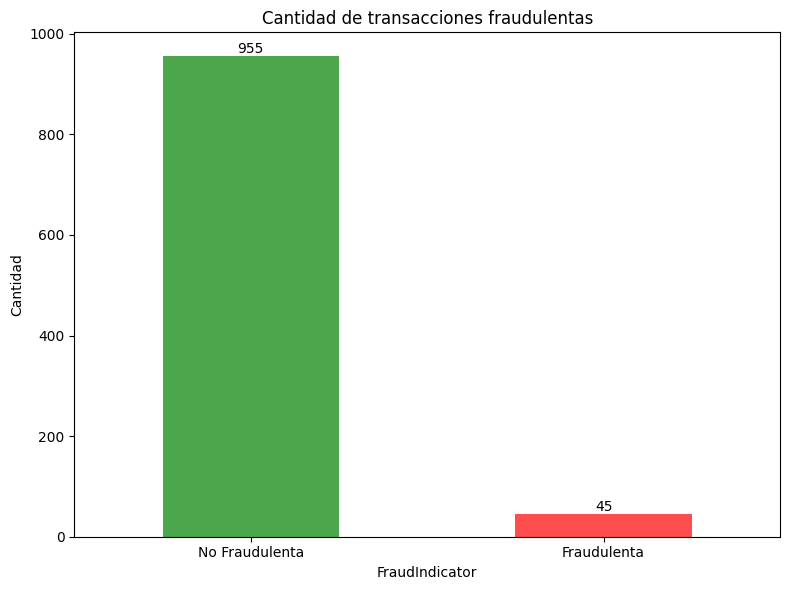

In [56]:
df = pd.read_csv('Data/fraud_indicators.csv')

conteo_fraudes = df['FraudIndicator'].value_counts()

plt.figure(figsize=(8, 6))
bars = conteo_fraudes.plot(kind='bar', color=['green', 'red'], alpha=0.7)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{int(bar.get_height())}',
             ha='center', va='bottom')

plt.title('Cantidad de transacciones fraudulentas')
plt.xlabel('FraudIndicator')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'], rotation=0)

plt.tight_layout()
plt.show()

Category
Other     21.0
Food      20.4
Travel    19.8
Online    19.6
Retail    19.2
Name: count, dtype: float64


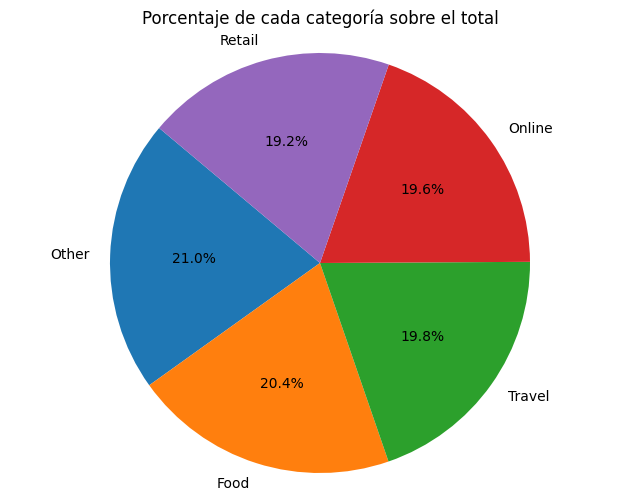

In [60]:

total_transacciones = len(fraudePorCat)
total_por_categoria = category['Category'].value_counts()

porcentaje_por_categoria = (total_por_categoria / total_transacciones) * 100

print(porcentaje_por_categoria)

plt.figure(figsize=(8, 6))
plt.pie(porcentaje_por_categoria, labels=porcentaje_por_categoria.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de cada categoría sobre el total')
plt.axis('equal')  
plt.show()

